In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sales=pd.read_csv('/content/drive/MyDrive/sales_data_set.csv')
stores=pd.read_csv('/content/drive/MyDrive/stores_data_set.csv')
features=pd.read_csv('/content/drive/MyDrive/Features_data_set.csv')


In [ ]:
sales


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
result = pd.merge(sales,stores, on='Store', how='inner')  # inner join
print(result)

        Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  05/02/2010      24924.50      False    A  151315
1           1     1  12/02/2010      46039.49       True    A  151315
2           1     1  19/02/2010      41595.55      False    A  151315
3           1     1  26/02/2010      19403.54      False    A  151315
4           1     1  05/03/2010      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  28/09/2012        508.37      False    B  118221
421566     45    98  05/10/2012        628.10      False    B  118221
421567     45    98  12/10/2012       1061.02      False    B  118221
421568     45    98  19/10/2012        760.01      False    B  118221
421569     45    98  26/10/2012       1076.80      False    B  118221

[421570 rows x 7 columns]


In [ ]:
df=pd.merge(result,features,on=['Store','Date'],how='outer')
print(df)

        Store  Dept        Date  Weekly_Sales IsHoliday_x Type      Size  \
0           1   1.0  05/02/2010      24924.50       False    A  151315.0   
1           1   2.0  05/02/2010      50605.27       False    A  151315.0   
2           1   3.0  05/02/2010      13740.12       False    A  151315.0   
3           1   4.0  05/02/2010      39954.04       False    A  151315.0   
4           1   5.0  05/02/2010      32229.38       False    A  151315.0   
...       ...   ...         ...           ...         ...  ...       ...   
423320     45   NaN  28/06/2013           NaN         NaN  NaN       NaN   
423321     45   NaN  05/07/2013           NaN         NaN  NaN       NaN   
423322     45   NaN  12/07/2013           NaN         NaN  NaN       NaN   
423323     45   NaN  19/07/2013           NaN         NaN  NaN       NaN   
423324     45   NaN  26/07/2013           NaN         NaN  NaN       NaN   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0       

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1.0,05/02/2010,24924.50,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2.0,05/02/2010,50605.27,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3.0,05/02/2010,13740.12,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4.0,05/02/2010,39954.04,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5.0,05/02/2010,32229.38,False,A,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Dept          421570 non-null  float64
 2   Date          423325 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  object 
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  float64
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [ ]:
df.isnull().sum()

Store                0
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Type              1755
Size              1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [ ]:
num_col=df.select_dtypes(include=['int64','float64']).columns
string_col=df.select_dtypes(exclude=['int64','float64']).columns

In [ ]:
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")

In [ ]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayOfWeek'] = df['Date'].dt.day

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(subset=['CPI','Unemployment'],inplace=True)

In [ ]:
columns=['Size','Weekly_Sales','Dept']
for col in columns:
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_threshold = df[col].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[col].quantile(0.25) - (1.5*iqr)
    # df[col] = df[col].clip(lower_threshold, upper_threshold)
    print(col,upper_threshold,lower_threshold)

Size 365805.5 -69662.5
Weekly_Sales 47395.15625 -25109.653749999998
Dept 158.0 -66.0


In [ ]:
len(df[df['Size']>365805.5 ])

0

In [ ]:
len(df[df['Size']<-69662.5 ])

0

In [ ]:
len(df[df['Weekly_Sales']>47395.15625 ])

35521

In [ ]:
len(df[df['Weekly_Sales']<-25109.653749999998 ])

0

In [ ]:
len(df[df['Dept']>158.0  ])

0

In [ ]:
len(df[df['Dept']<-66.0])

0

In [ ]:
df.Dept=df.Dept.fillna(df.Dept.mean())

In [ ]:
df.Weekly_Sales=df.Weekly_Sales.fillna(df.Weekly_Sales.mean())

In [ ]:
df.Size=df.Size.fillna(df.Size.mean())

In [ ]:
df.Type=df.Type.fillna(df.Type.mode()[0] )

In [ ]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [ ]:
df.drop(columns=['IsHoliday_x'],inplace=True)

In [ ]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    392944
True      29796
Name: count, dtype: int64

In [ ]:
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [ ]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'month', 'year',
       'dayOfWeek'],
      dtype='object')

In [ ]:
df.MarkDown1.fillna(0, inplace = True)
df.MarkDown2.fillna(0, inplace = True)
df.MarkDown3.fillna(0, inplace = True)
df.MarkDown4.fillna(0, inplace = True)
df.MarkDown5.fillna(0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422740 entries, 0 to 423311
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         422740 non-null  int64  
 1   Dept          422740 non-null  float64
 2   Weekly_Sales  422740 non-null  float64
 3   Type          422740 non-null  object 
 4   Size          422740 non-null  float64
 5   Temperature   422740 non-null  float64
 6   Fuel_Price    422740 non-null  float64
 7   MarkDown1     422740 non-null  float64
 8   MarkDown2     422740 non-null  float64
 9   MarkDown3     422740 non-null  float64
 10  MarkDown4     422740 non-null  float64
 11  MarkDown5     422740 non-null  float64
 12  CPI           422740 non-null  float64
 13  Unemployment  422740 non-null  float64
 14  IsHoliday     422740 non-null  bool   
 15  month         422740 non-null  int32  
 16  year          422740 non-null  int32  
 17  dayOfWeek     422740 non-null  int32  
dtypes: bool(1

In [ ]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
month           0
year            0
dayOfWeek       0
dtype: int64

In [ ]:
df.shape


(422740, 18)

In [ ]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [ ]:
col_df=df.columns

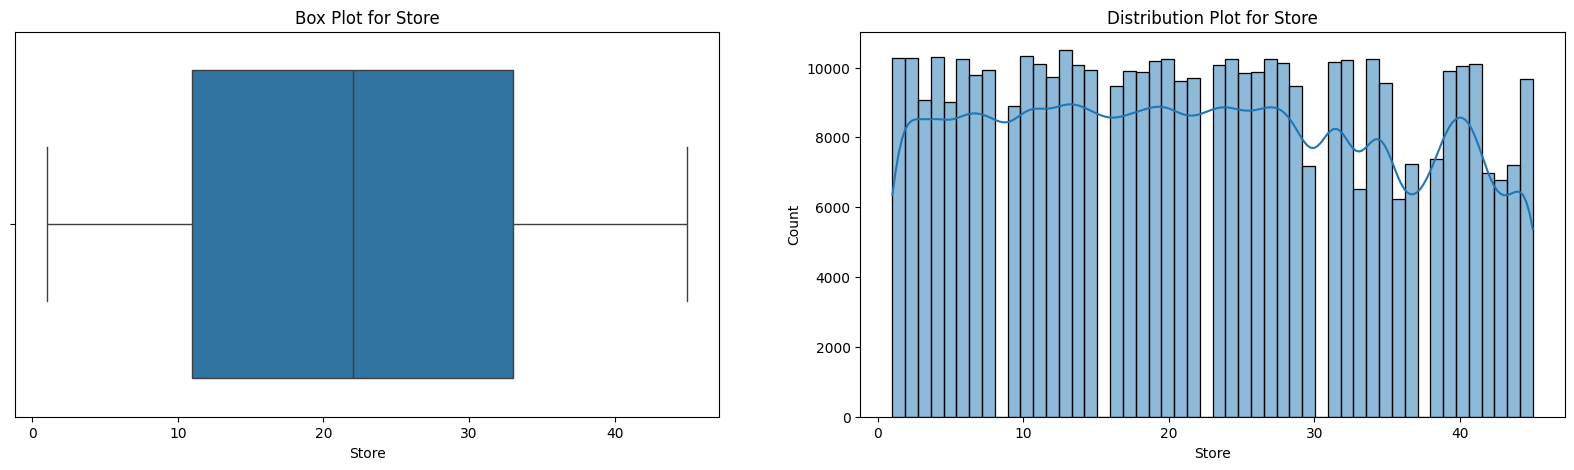

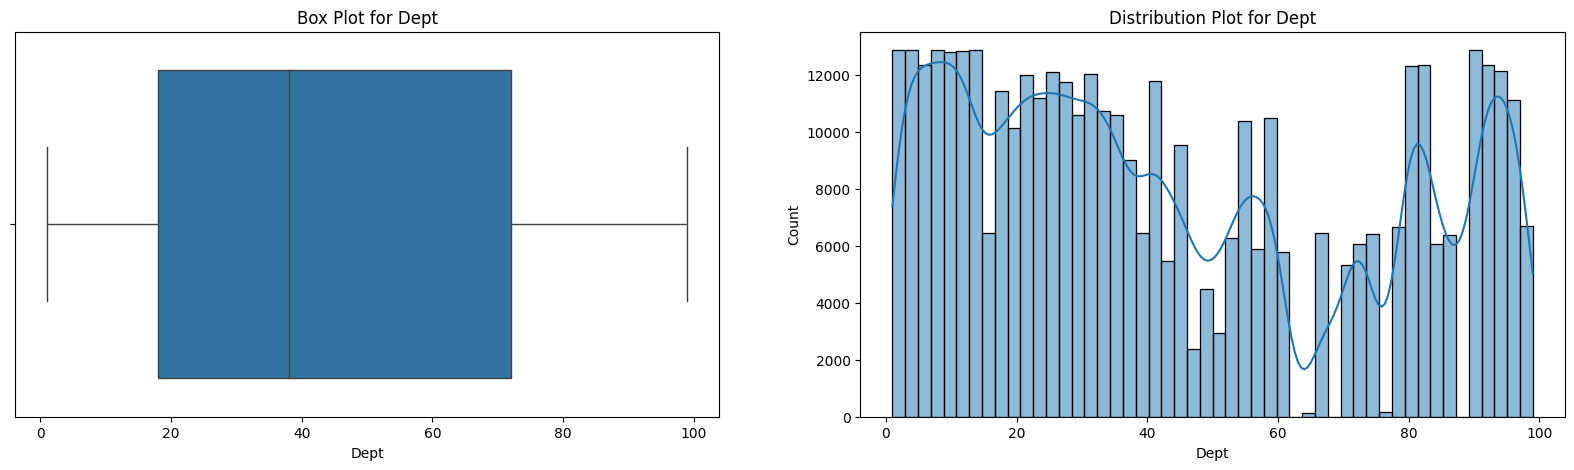

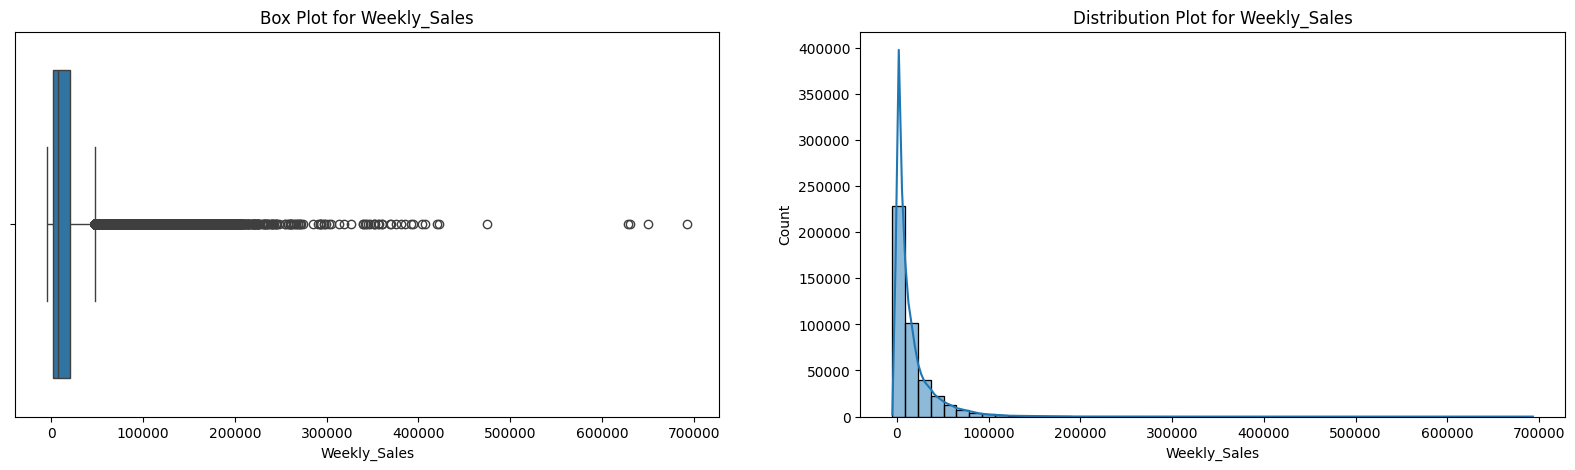

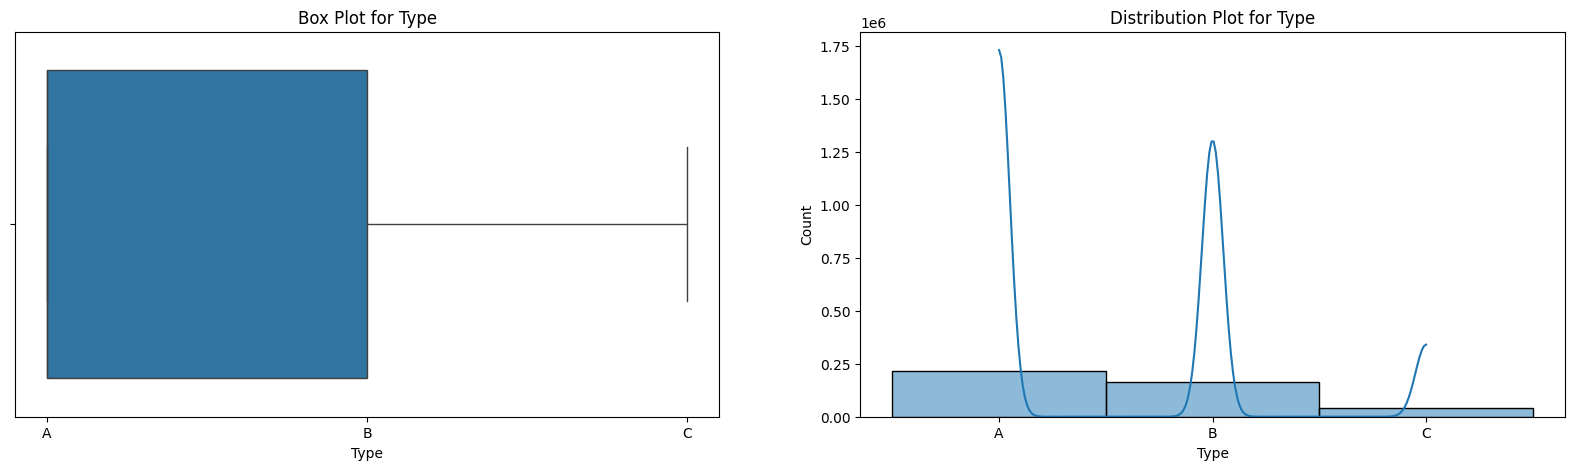

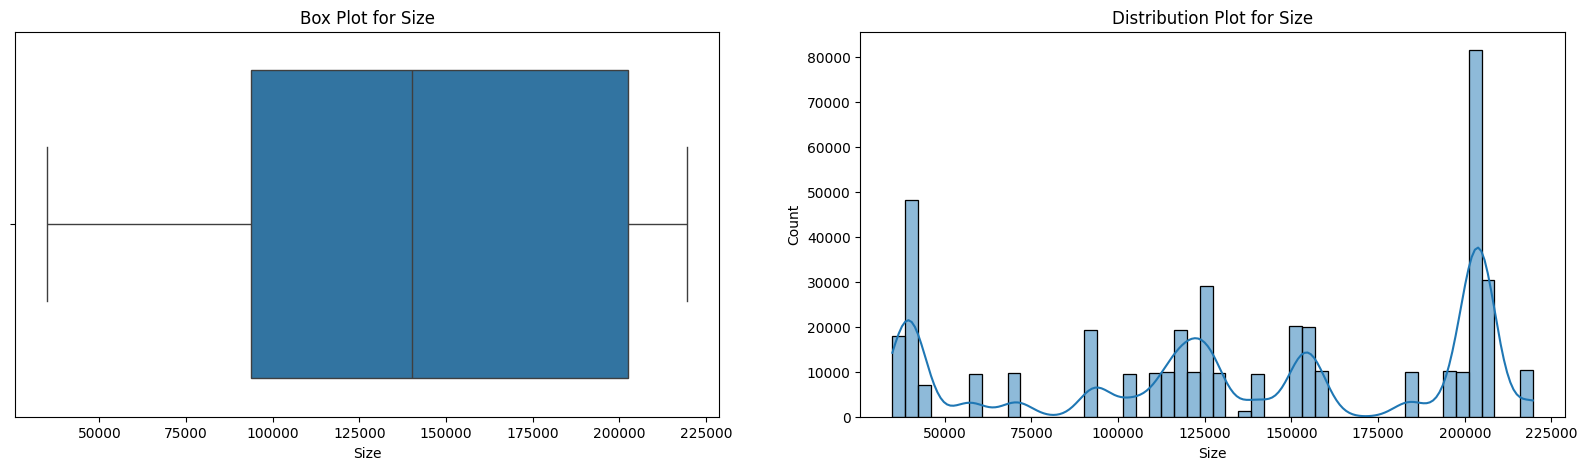

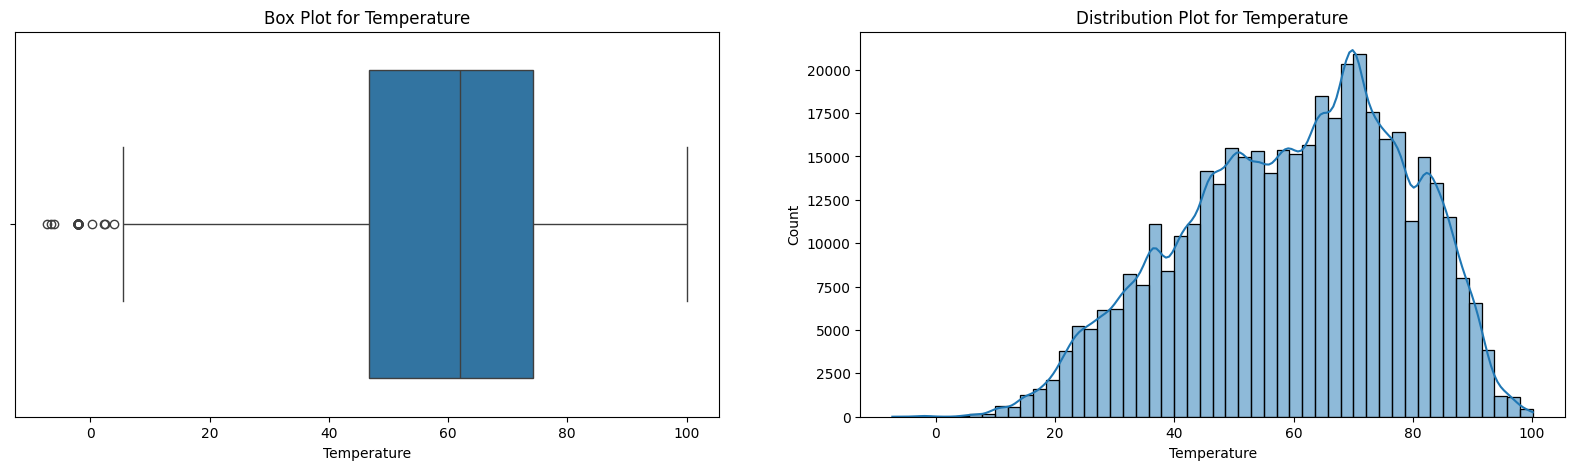

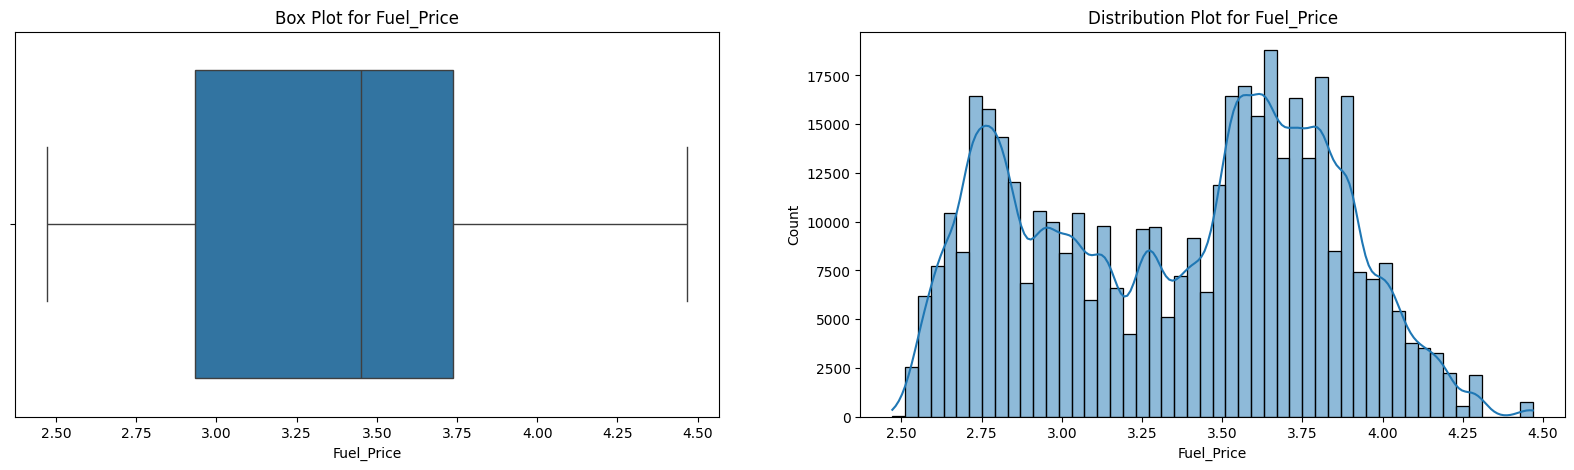

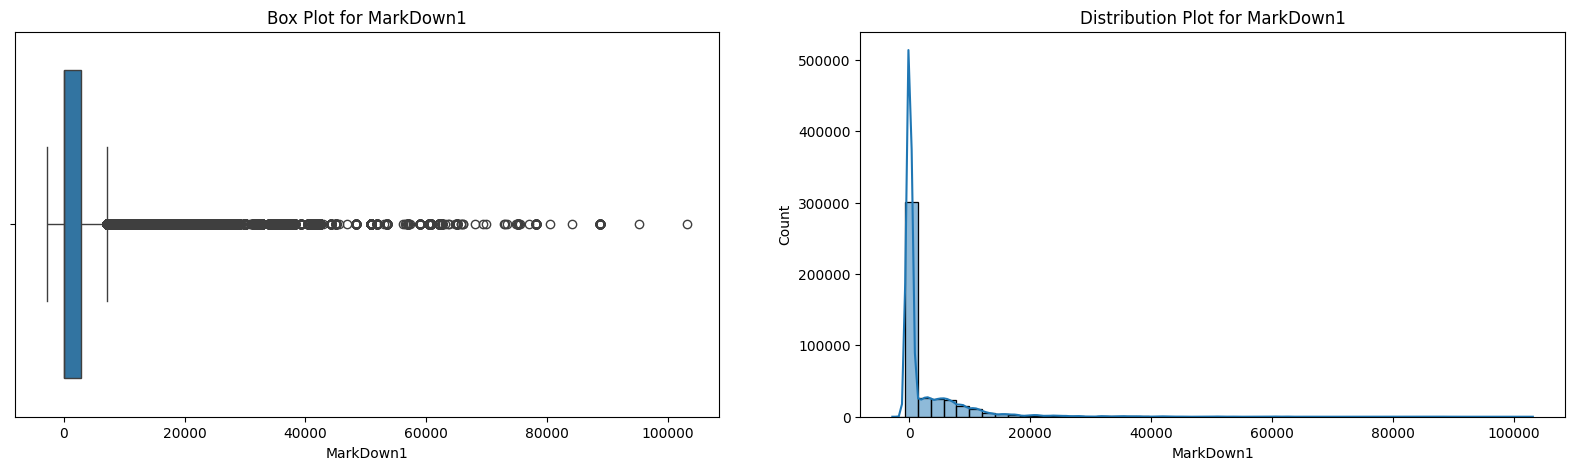

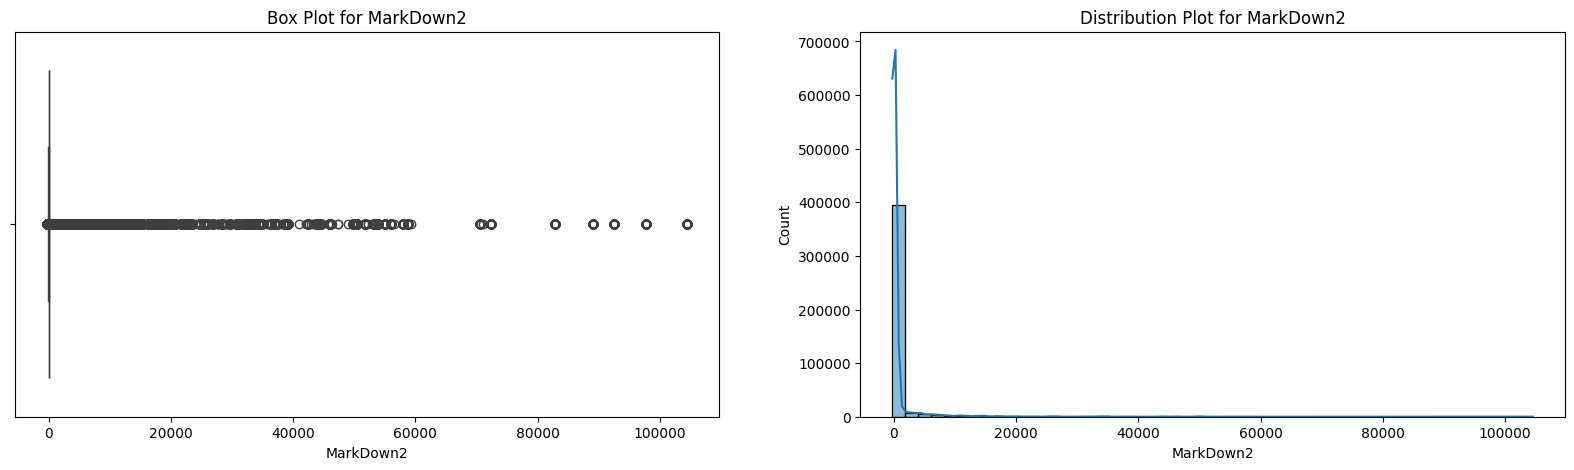

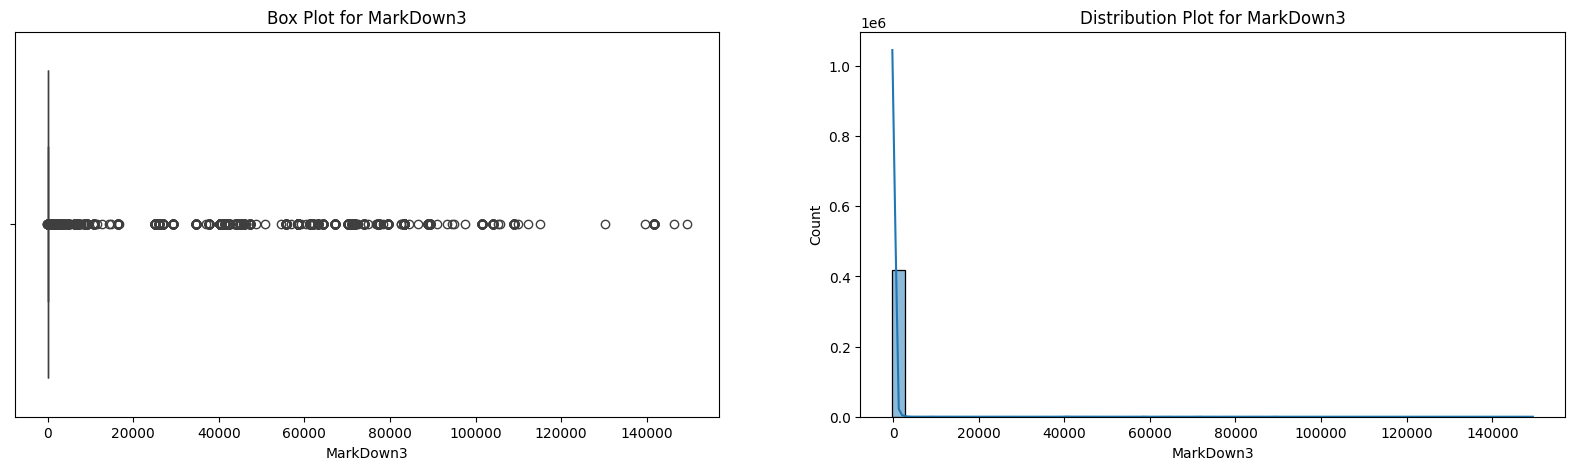

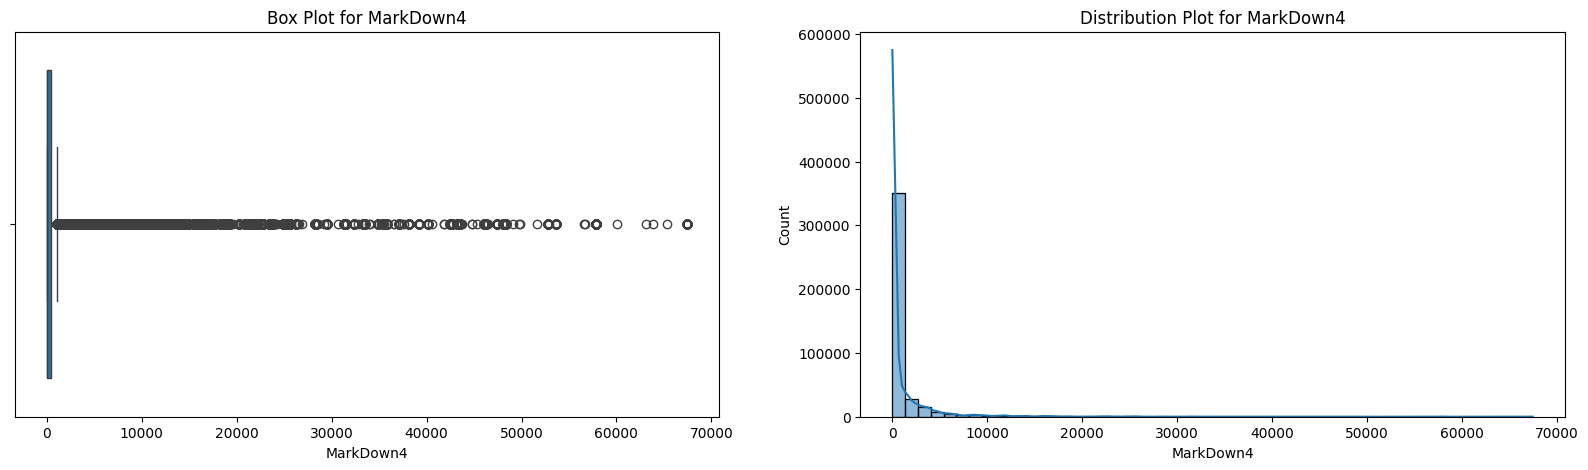

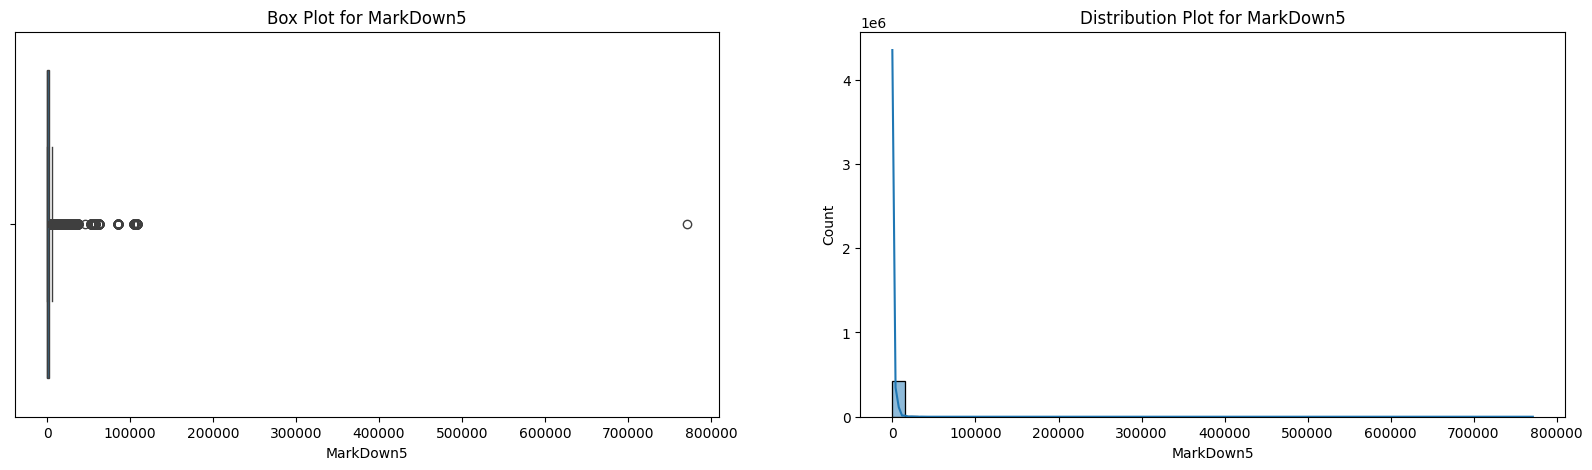

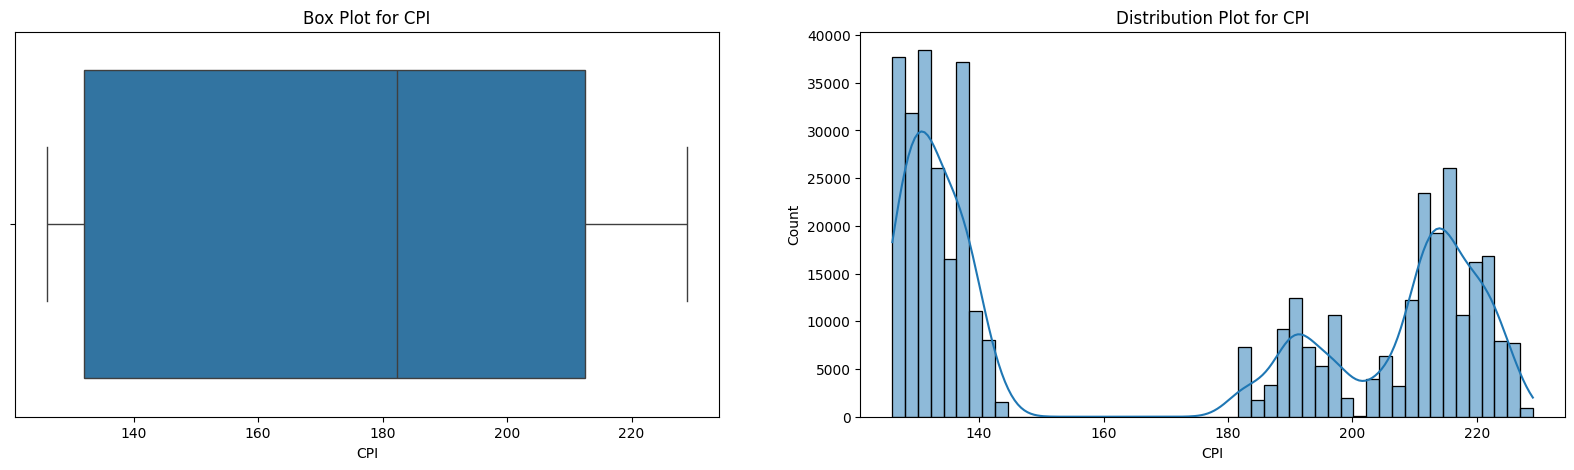

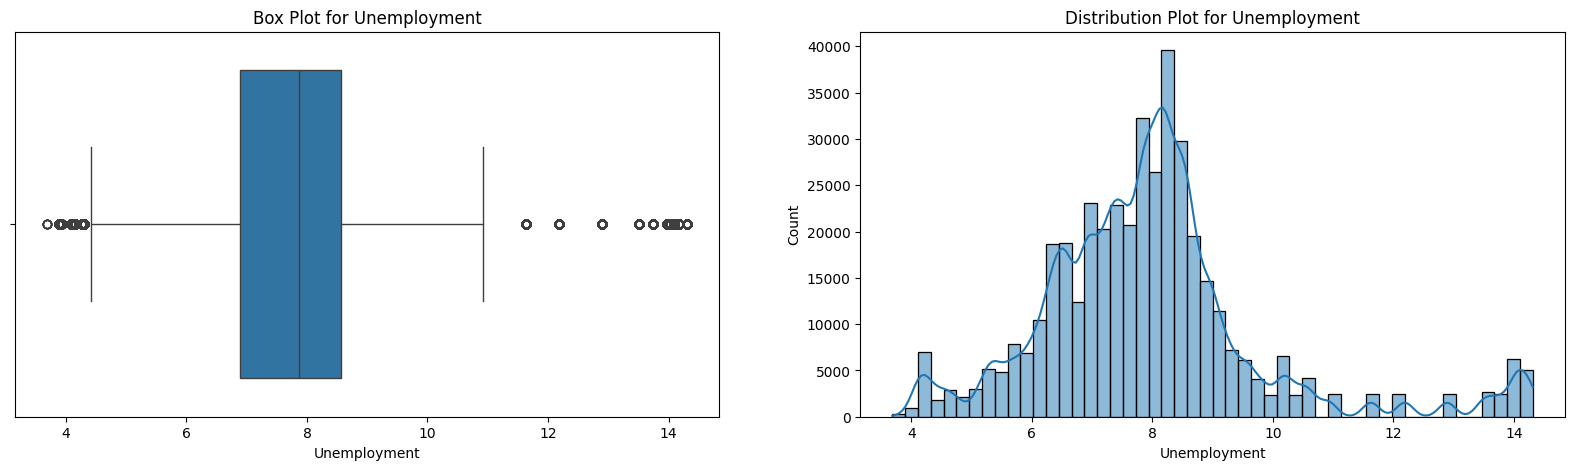

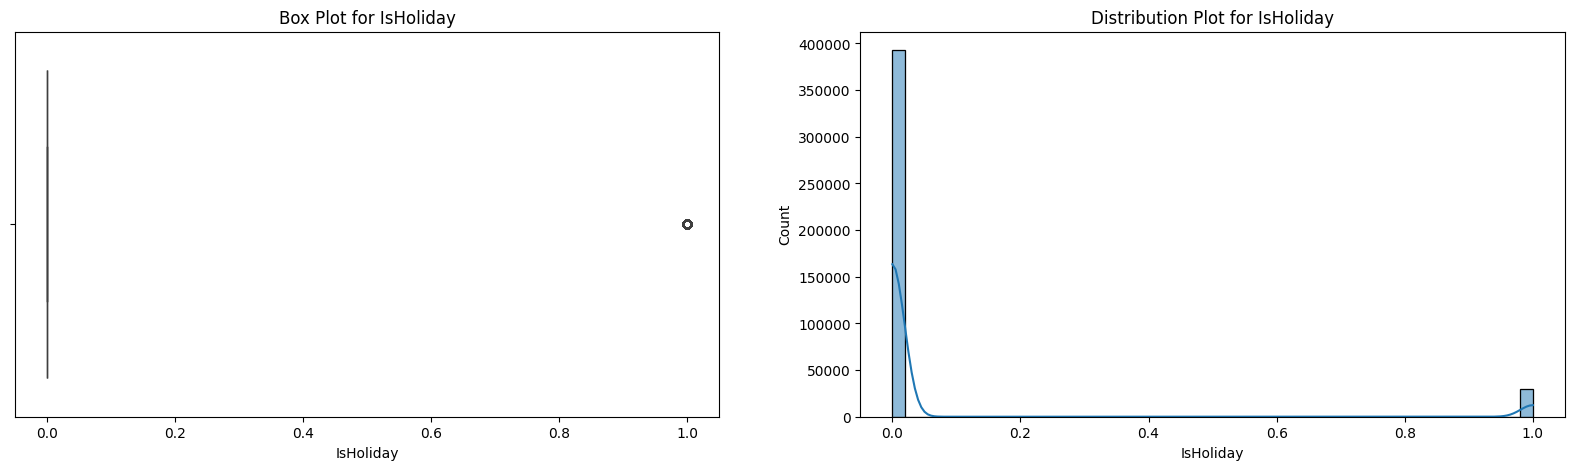

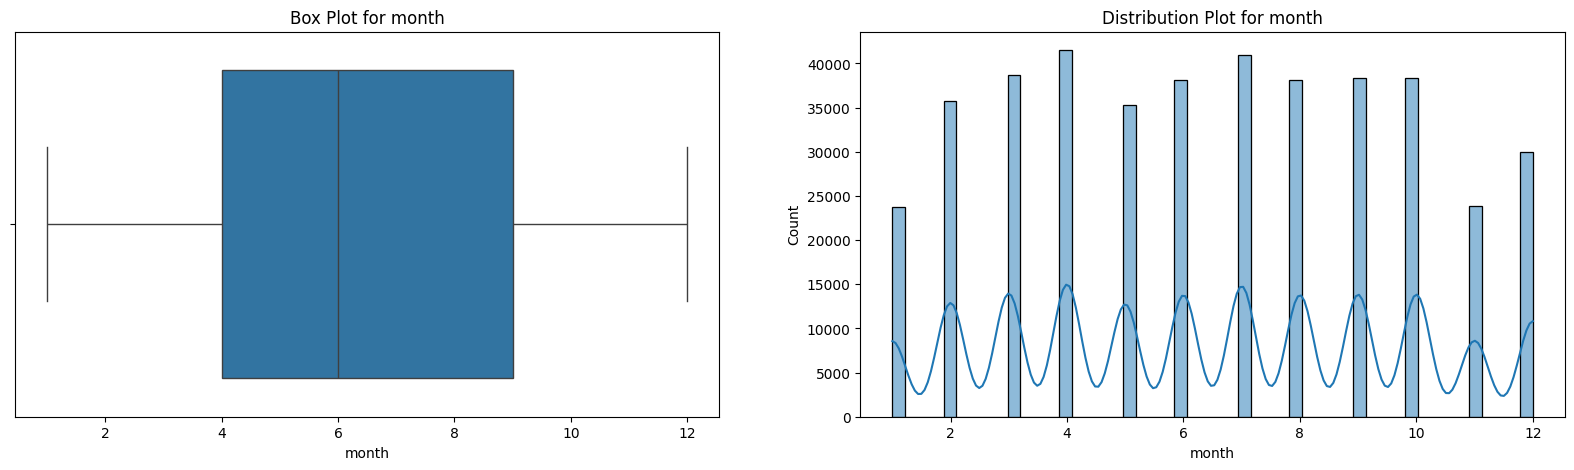

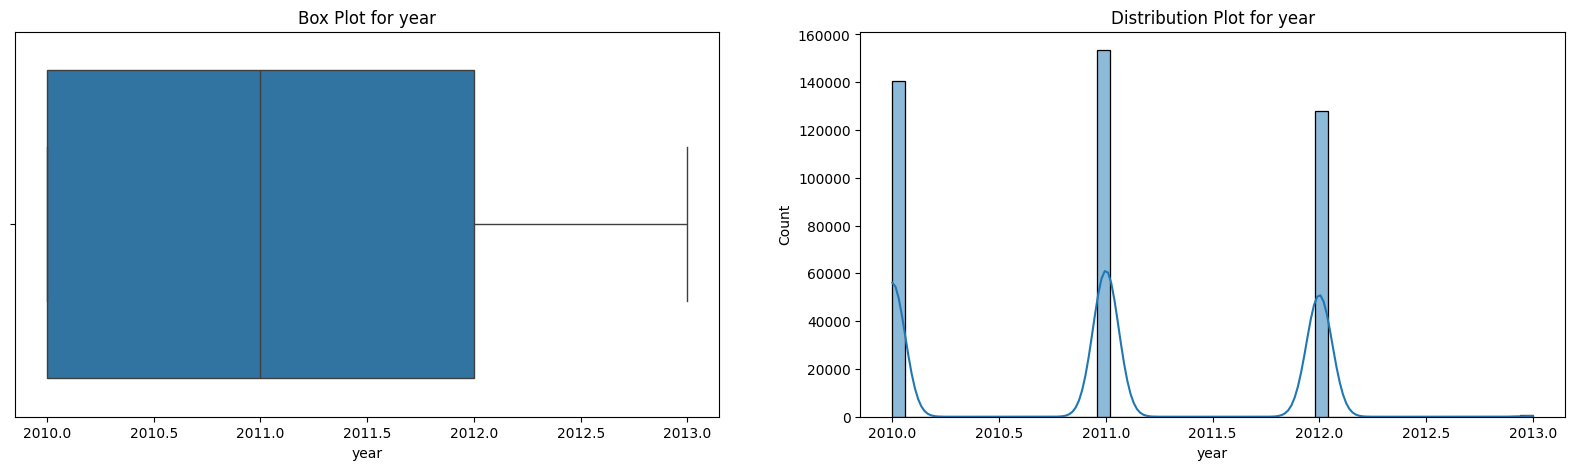

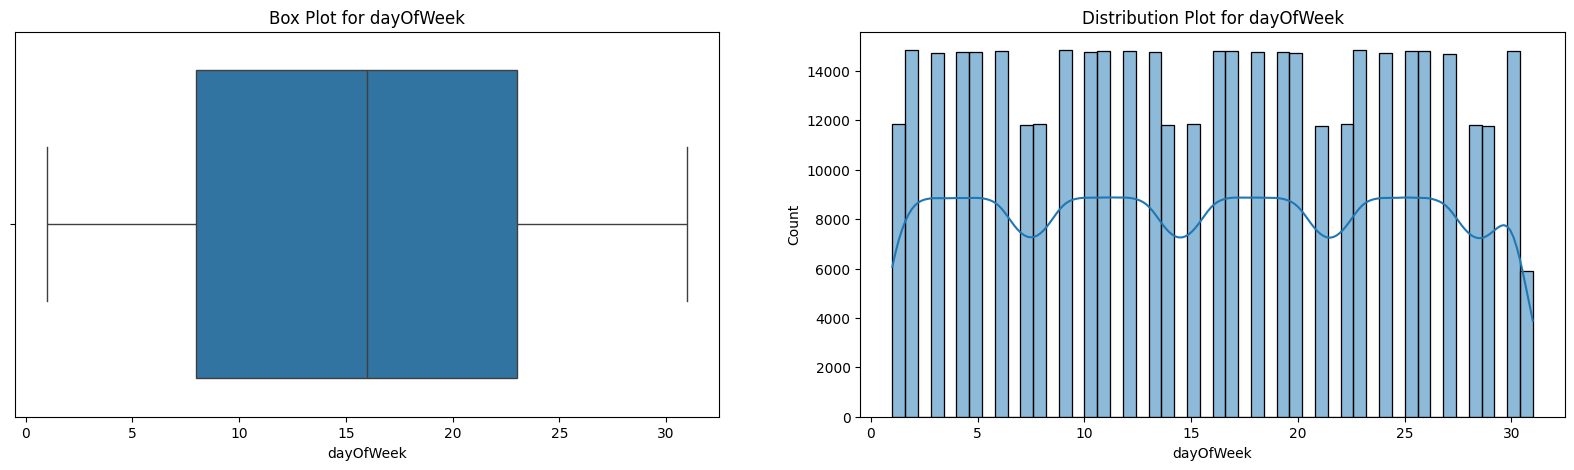

In [ ]:
for i in col_df:
  plot(df,i)

In [ ]:
iqr = df['Weekly_Sales'].quantile(0.75) - df['Weekly_Sales'].quantile(0.25)
upper_threshold = df['Weekly_Sales'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Weekly_Sales'].quantile(0.25) - (1.5*iqr)
print(upper_threshold,lower_threshold)
df['Weekly_Sales'] = df['Weekly_Sales'].clip(lower_threshold, upper_threshold)

47228.58625 -24992.323750000003


In [ ]:
iqr = df['Unemployment'].quantile(0.75) - df['Unemployment'].quantile(0.25)
upper_threshold = df['Unemployment'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Unemployment'].quantile(0.25) - (1.5*iqr)
df['Unemployment'] = df['Unemployment'].clip(lower_threshold, upper_threshold)
print(upper_threshold,lower_threshold)

11.081 4.377


In [ ]:
iqr = df['MarkDown1'].quantile(0.75) - df['MarkDown1'].quantile(0.25)
upper_threshold = df['MarkDown1'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['MarkDown1'].quantile(0.25) - (1.5*iqr)
df['MarkDown1'] = df['MarkDown1'].clip(lower_threshold, upper_threshold)
print(upper_threshold,lower_threshold)

7101.950000000001 -4261.17


In [ ]:
def outlier(col):
  iqr = col.quantile(0.75) - col.quantile(0.25)
  upper_threshold = col.quantile(0.75) + (1.5*iqr)
  lower_threshold = col.quantile(0.25) - (1.5*iqr)
  col = col.clip(lower_threshold, upper_threshold)
  print(upper_threshold,lower_threshold)
  return col

In [ ]:
df['MarkDown1']=outlier(df['MarkDown1'])

7101.950000000001 -4261.17


In [ ]:
df.head(5)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,month,year,dayOfWeek
0,1,1.0,24924.50000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,2.0,47228.58625,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
2,1,3.0,13740.12000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
3,1,4.0,39954.04000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
4,1,5.0,32229.38000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
df['MarkDown2']=outlier(df['MarkDown2'])

7.049999999999999 -4.2299999999999995


In [ ]:
df['MarkDown3']=outlier(df['MarkDown3'])

11.725000000000001 -7.035


In [ ]:
df['MarkDown4']=outlier(df['MarkDown4'])

1068.475 -641.085


In [ ]:
df['MarkDown5']=outlier(df['MarkDown5'])

5443.08125 -3265.84875


In [ ]:
df.head(5)

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,month,year,dayOfWeek
0,1,1.0,24924.50000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,2.0,47228.58625,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
2,1,3.0,13740.12000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
3,1,4.0,39954.04000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
4,1,5.0,32229.38000,A,151315.0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
len(df[df['Unemployment']<4.377])

0

In [ ]:
len(df[df['Unemployment']>11.081])

0

In [ ]:
columns=["Type", "IsHoliday"]
encode=LabelEncoder()

for column in columns:
  encode.fit(df[[column]])
  df[column] = encode.transform(df[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,month,year,dayOfWeek
Store,1.000000,0.023969,-0.076602,0.225687,-0.182619,-0.050161,0.065445,-0.084634,-0.057503,-0.034165,-0.095084,-0.052942,-0.211049,0.240639,-0.000516,0.000962,0.003336,-0.000027
Dept,0.023969,1.000000,0.102297,0.003704,-0.002966,0.004429,0.003569,0.000631,0.001715,0.003943,-0.000062,0.003265,-0.007466,0.008918,0.000914,0.000901,0.003713,-0.000677
Weekly_Sales,-0.076602,0.102297,1.000000,-0.192226,0.262138,0.001921,0.003603,0.058463,0.031952,0.049273,0.053615,0.059652,-0.031126,-0.021239,0.006575,0.026585,-0.010505,-0.005995
Type,0.225687,0.003704,-0.192226,1.000000,-0.810714,0.044822,0.028570,-0.160506,-0.105567,-0.084823,-0.150162,-0.153225,-0.066018,0.144658,-0.001226,0.000559,-0.000966,0.000455
Size,-0.182619,-0.002966,0.262138,-0.810714,1.000000,-0.058213,0.003359,0.201963,0.114868,0.126932,0.188232,0.189076,-0.003309,-0.071178,0.000592,-0.001207,-0.004942,-0.000385
Temperature,-0.050161,0.004429,0.001921,0.044822,-0.058213,1.000000,0.142572,-0.009245,-0.090560,-0.071068,0.000970,-0.031252,0.181789,0.081172,-0.155914,0.236018,0.060484,0.026901
Fuel_Price,0.065445,0.003569,0.003603,0.028570,0.003359,0.142572,1.000000,0.426711,0.310674,0.376195,0.414334,0.396048,-0.164460,-0.053626,-0.078075,-0.041313,0.776598,0.027782
MarkDown1,-0.084634,0.000631,0.058463,-0.160506,0.201963,-0.009245,0.426711,1.000000,0.722822,0.751170,0.929418,0.855613,0.035717,-0.178840,0.001868,-0.050516,0.692921,-0.056871
MarkDown2,-0.057503,0.001715,0.031952,-0.105567,0.114868,-0.090560,0.310674,0.722822,1.000000,0.630276,0.704571,0.719957,0.050413,-0.172622,0.057671,-0.067115,0.610109,0.056624
MarkDown3,-0.034165,0.003943,0.049273,-0.084823,0.126932,-0.071068,0.376195,0.751170,0.630276,1.000000,0.732818,0.772189,0.033889,-0.180790,0.078864,0.072282,0.619563,-0.070085


<Axes: >

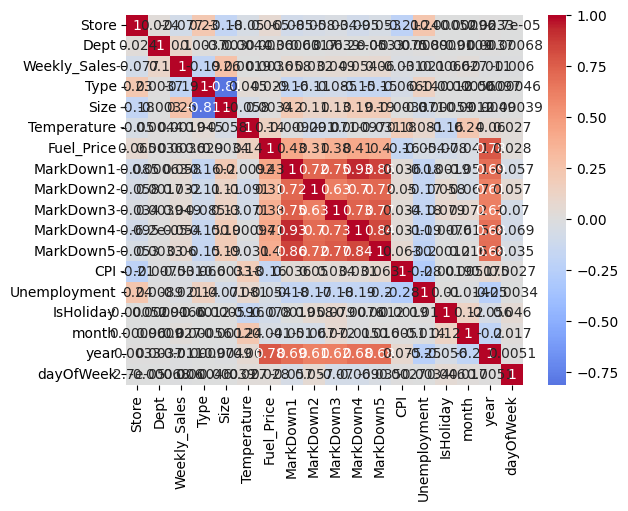

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)


In [ ]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
month           0
year            0
dayOfWeek       0
dtype: int64

In [ ]:
X=scaled_df.drop("Weekly_Sales",axis=1)
Y=scaled_df["Weekly_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
model = HistGradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mse, r2_test)

0.09148635668578255 0.9085178053937516


In [ ]:
#imputer = SimpleImputer(strategy='mean')
#X_train_imputed = imputer.fit_transform(x_train)
#X_test_imputed = imputer.transform(x_test)

# Initialize and train ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train, y_train)


# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}',r2_test)

Mean Squared Error: 0.015525570514835715 0.9844751358053374
